In [20]:
import pandas as pd
import numpy as np
import functools as ft
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
COLORS = [
    '#00B0F0',
    '#FF0000'
]

In [3]:
dfs = []
for x in range(2004, 2024):
    y = pd.read_csv(f'data/{x}.csv', sep='\t').dropna(thresh=2).reset_index(drop=True)[['Country', f'{x-1}', f'{x}', f'{x+1}']].rename({
        f'{x-1}': f'{x-1}_in_{x}',
        f'{x}': f'{x}_in_{x}',
        f'{x+1}': f'{x+1}_in_{x}',
    }, axis=1)
    y[f'{x-1}_in_{x}'] = y[f'{x-1}_in_{x}'].astype(str).str.replace(' ', '').str.replace('--', 'NaN').astype(float)
    y[f'{x}_in_{x}'] = y[f'{x}_in_{x}'].astype(str).str.replace(' ', '').str.replace('--', 'NaN').astype(float)
    y[f'{x+1}_in_{x}'] = y[f'{x+1}_in_{x}'].astype(str).str.replace(' ', '').str.replace('--', 'NaN').astype(float)
    dfs.append(y)
df = ft.reduce(lambda left, right: pd.merge(left, right, on='Country'), dfs)
df.dropna(inplace=True)
df.head()

,Country,2003_in_2004,2004_in_2004,2005_in_2004,2004_in_2005,2005_in_2005,2006_in_2005,2005_in_2006,2006_in_2006,2007_in_2006,...,2021_in_2020,2020_in_2021,2021_in_2021,2022_in_2021,2021_in_2022,2022_in_2022,2023_in_2022,2022_in_2023,2023_in_2023,2024_in_2023
0,Antigua and Barbuda,2.5,1.0,0.5,4.1,2.4,2.6,5.0,7.1,3.9,...,4.701,-20.031,0.965,7.019,5.270,6.021,5.629,8.459,5.592,5.417
1,Argentina,8.8,7.0,4.0,9.0,7.5,4.2,9.2,8.0,6.0,...,4.889,-9.905,7.500,2.465,10.398,4.037,2.024,4.956,-2.500,2.750
2,Barbados,2.2,3.0,2.5,4.4,3.1,3.3,3.9,4.2,4.9,...,7.400,-18.000,3.300,8.500,0.700,10.500,5.000,9.800,4.500,3.900
3,Belize,9.4,3.0,3.3,4.6,2.2,2.7,3.5,5.3,2.6,...,8.000,-14.038,8.500,5.400,16.342,3.502,1.998,12.726,4.007,2.998
4,Bolivia,2.5,3.8,4.5,3.6,3.9,2.5,4.1,4.1,3.9,...,5.600,-8.829,4.950,4.000,6.106,3.800,3.200,3.478,1.800,1.800


In [4]:
df[df['Country'] == 'Guyana'][['2020_in_2021', '2021_in_2022', '2022_in_2023']]

,2020_in_2021,2021_in_2022,2022_in_2023
15,43.48,23.774,62.288


In [5]:
# wtf?!
df = df[df['Country'] != 'Guyana']

In [6]:
for x in range(2004, 2024):
    df[f'expected_growth_{x+1}'] = df[f'{x+1}_in_{x}'].astype(float)
    df[f'expected_growth_delta_{x+1}'] = df[f'{x+1}_in_{x}'].astype(float) - df[f'{x}_in_{x}'].astype(float)
    df[f'actual_growth_{x-1}'] = df[f'{x-1}_in_{x}'].astype(float)
df[['expected_growth_2008', 'expected_growth_delta_2008', 'actual_growth_2008']].head()

,expected_growth_2008,expected_growth_delta_2008,actual_growth_2008
0,1.8,-2.0,2.800
1,5.5,-2.0,6.758
2,2.7,-1.5,0.180
3,3.0,-1.1,3.771
4,5.4,1.5,6.100


In [7]:
base = {}
for x in range(2005, 2024):
    base[f'year_{x}'] = 0
for c in df['Country'].unique():
    base[f'country_{c}'] = 0

table = []
for x in range(2005, 2023):
    for c in df['Country'].unique():
        table.append({
            **base,
            'country': c,
            f'year_{x}': 1,
            f'country_{c}': 1,
            'expected_growth': df[f'expected_growth_{x}'][df['Country'] == c].iloc[0],
            'expected_growth_delta': df[f'expected_growth_delta_{x+1}'][df['Country'] == c].iloc[0],
            'actual_growth': df[f'actual_growth_{x}'][df['Country'] == c].iloc[0],
        })
X = pd.DataFrame(table).drop(['country_Mexico', 'year_2005'], axis=1)
groups = X['country']
X.drop('country', axis=1, inplace=True)
X.head()

,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,...,country_St. Kitts and Nevis,country_St. Lucia,country_St. Vincent and the Grenadines,country_Suriname,country_Trinidad and Tobago,country_Uruguay,country_Venezuela,expected_growth,expected_growth_delta,actual_growth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.5,0.2,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.0,-3.3,9.2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.5,0.2,3.9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.3,0.5,3.5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4.5,-1.4,4.1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          actual_growth   R-squared (uncentered):                   0.371
Model:                            OLS   Adj. R-squared (uncentered):              0.370
Method:                 Least Squares   F-statistic:                              141.0
Date:                Thu, 20 Feb 2025   Prob (F-statistic):                    1.92e-12
Time:                        08:49:18   Log-Likelihood:                         -1543.6
No. Observations:                 522   AIC:                                      3089.
Df Residuals:                     521   BIC:                                      3093.
Df Model:                           1                                                  
Covariance Type:              cluster                                                  
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
expected_growth     0.9099      0.077     11.873      0.000       0.760       1.060
==============================================================================
Omnibus:                      238.036   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1651.573
Skew:                          -1.866   Prob(JB):                         0.00
Kurtosis:                      10.874   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are robust to cluster correlation (cluster)
"""

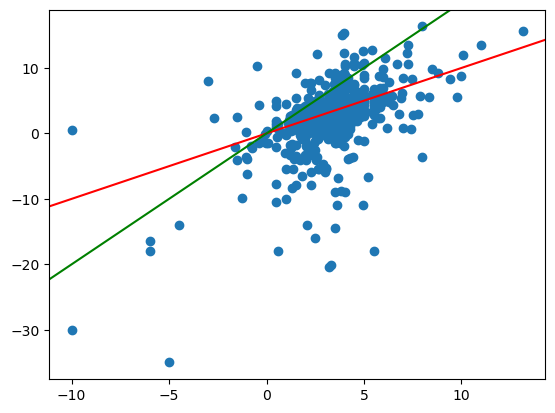

In [25]:
plt.scatter(X['expected_growth'], X['actual_growth'])
plt.axline([0, 0], [1, 1], color='red')
model = sm.OLS(X['actual_growth'], X['expected_growth'])
fitted_model = model.fit(cov_type='cluster', cov_kwds={'groups': groups})
x = np.arange(1, 3)
plt.axline(x, fitted_model.params.expected_growth * x, color='green')
fitted_model.summary()

In [8]:
df[df['Country'] == 'Argentina'][['2008_in_2008', '2009_in_2008', '2009_in_2010', '2009_in_2009', '2010_in_2009', '2010_in_2011']]

,2008_in_2008,2009_in_2008,2009_in_2010,2009_in_2009,2010_in_2009,2010_in_2011
1,6.5,3.6,0.856,-2.523,1.5,9.161


In [9]:
X[(X['country_Argentina'] == 1) & (X['year_2009'] == 1)][['expected_growth', 'expected_growth_delta', 'actual_growth']]

,expected_growth,expected_growth_delta,actual_growth
117,3.6,4.023,0.856


In [10]:
X[(X['country_Argentina'] == 1) & (X['year_2010'] == 1)][['expected_growth', 'expected_growth_delta', 'actual_growth']]

,expected_growth,expected_growth_delta,actual_growth
146,1.5,-3.442,9.161


Argentina was in 2008 growing at 6.5% yearly. For 2009, the IMF predicted a growth of 3.6%, which is 2.9 percentage points lower, a slow down of the economy. The actual growth was 0.856% as measured in 2010, which confirms the slow down actually happened but to a faster speed.

In 2009, the economy was believed to be growing at -2.523%, the prediction for 2010 was a growth of 1.5%, while the actual growth was 9.161%.

In [26]:
y = X['actual_growth']
model = sm.OLS(y, sm.add_constant(X.drop(['actual_growth'], axis=1)))
fitted_model = model.fit(cov_type='cluster', cov_kwds={'groups': groups})
fitted_model.summary()

/home/seppo/.local/lib/python3.12/site-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 48, but rank is 19
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          actual_growth   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     40.52
Date:                Thu, 20 Feb 2025   Prob (F-statistic):           1.67e-15
Time:                        08:49:55   Log-Likelihood:                -1189.0
No. Observations:                 522   AIC:                             2474.
Df Residuals:                     474   BIC:                             2678.
Df Model:                          47                                         
Covariance Type:              cluster                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      2.0585      0.454      4.533      0.000       1.168       2.949
year_2006                                  0.2093      0.479      0.437      0.662      -0.729       1.148
year_2007                                 -0.6015      0.572     -1.051      0.293      -1.723       0.520
year_2008                                 -2.1790      0.631     -3.454      0.001      -3.416      -0.942
year_2009                                 -4.0688      0.747     -5.445      0.000      -5.533      -2.604
year_2010                                  0.1756      0.588      0.299      0.765      -0.976       1.328
year_2011                                 -1.7370      0.635     -2.734      0.006      -2.982      -0.492
year_2012                                 -1.6874      0.581     -2.903      0.004      -2.826      -0.548
year_2013                                 -1.6917      0.441     -3.834      0.000      -2.556      -0.827
year_2014                                 -1.7324      0.429     -4.036      0.000      -2.574      -0.891
year_2015                                 -2.4395      0.453     -5.389      0.000      -3.327      -1.552
year_2016                                 -2.3334      0.520     -4.489      0.000      -3.352      -1.315
year_2017                                 -2.1249      0.591     -3.593      0.000      -3.284      -0.966
year_2018                                 -1.5995      0.647     -2.472      0.013      -2.868      -0.331
year_2019                                 -3.2259      0.534     -6.043      0.000      -4.272      -2.180
year_2020                                 -4.2257      1.848     -2.286      0.022      -7.848      -0.603
year_2021                                  1.3809      0.785      1.759      0.079      -0.158       2.919
year_2022                                 -1.3349      0.537     -2.484      0.013      -2.388      -0.281
year_2023                               3.651e-17   2.02e-16      0.181      0.856   -3.59e-16    4.32e-16
country_Antigua and Barbuda                0.7948      0.123      6.455      0.000       0.553       1.036
country_Argentina                          1.1941      0.158      7.568      0.000       0.885       1.503
country_Barbados                          -0.9566      0.081    -11.766      0.000      -1.116      -0.797
country_Belize                             0.7000      0.023     30.252      0.000       0.655       0.745
country_Bolivia                            0.7202      0.157      4.573      0.000       0.412       1.029
country_Brazil                            -0.1441      0.075     -1.925      0.054      -0.291       0.003
country_Chile                              0.1079      0.164      0.660      0.510     

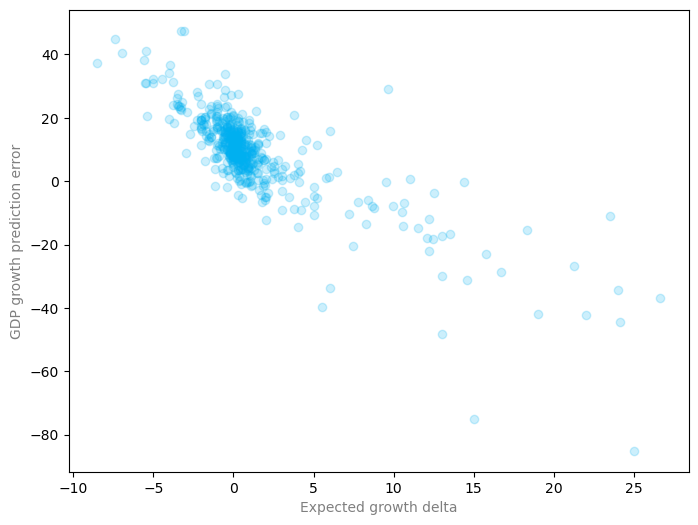

In [12]:
y_pred = fitted_model.predict(X)
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X['expected_growth_delta'], y - y_pred, color=COLORS[0], label='Observed', alpha=.2)
plt.xlabel('Expected growth delta', alpha=.5)
plt.ylabel('GDP growth prediction error', alpha=.5)

plt.show()